In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

# Assignment(6-6)

## Initializations

In [2]:
house = pd.read_csv("house_features_for_model.csv")
price = pd.read_csv("house_prices_for_model.csv")

X= house
Y= price

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))


Eğitim kümesindeki gözlem sayısı : 1103
Test kümesindeki gözlem sayısı   : 276


## Model Train

In [4]:
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     315.0
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:32:39   Log-Likelihood:                -13039.
No. Observations:                1103   AIC:                         2.611e+04
Df Residuals:                    1086   BIC:                         2.620e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     7.907e+04   1.91e+04      4.147      0.000    4.17e+04    1.16e+05
Neighborhood_Crawfor      3.567e+04   5418.485      6.582      0.000     2.5e+04    4.63e+04
Neighborhood_NoRidge      6.342e+04   6558.266      9.670      0.000    5.05e+04    7.63e+04
Neighborhood_NridgHt      2.982e+04   5218.836      5.714      0.000    1.96e+04    4.01e+04
Neighborhood_StoneBr      5.477e+04   7823.646      7.000      0.000    3.94e+04    7.01e+04
Neighborhood_Veenker      2.052e+04   1.14e+04      1.806      0.071   -1774.446    4.28e+04
Condition2_PosN          -1.498e+05   2.43e+04     -6.156      0.000   -1.97e+05   -1.02e+05
Exterior1st_BrkFace       1.686e+04   5523.395      3.053      0.002    6023.583    2.77e+04
Fireplaces                1.097e+04   1791.719      6.122      0.000    7452.668    1.45e+04
GarageArea                  34.2444      9.879      3.466      0.001      14.860      53.629
OverallQual              -4.162e+04   5821.414     -7.150      0.000    -5.3e+04   -3.02e+04
OverallCond               8322.2997   1043.358      7.976      0.000    6275.075    1.04e+04
GarageCars                9123.7944   3053.449      2.988      0.003    3132.467    1.51e+04
TotRmsAbvGrd             -1.335e+05   1.29e+04    -10.368      0.000   -1.59e+05   -1.08e+05
OverallQual * LotArea        0.1245      0.015      8.478      0.000       0.096       0.153
YearBuilt * TotRmsAbvGrd    72.3549      6.614     10.939      0.000      59.376      85.334
OverallQual**2            5015.7520    463.251     10.827      0.000    4106.783    5924.721
==============================================================================
Omnibus:                      289.291   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19408.350
Skew:                          -0.039   Prob(JB):                         0.00
Kurtosis:                      23.550   Cond. No.                     2.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Metrics on Test Set

In [5]:
X_test = sm.add_constant(X_test)

Y_test_pred = model.predict(X_test)

Y_pred = model.predict(X)

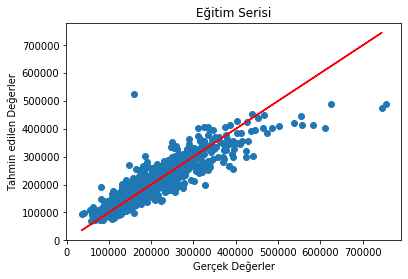

In [6]:
plt.scatter(Y, Y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Eğitim Serisi")
plt.show()

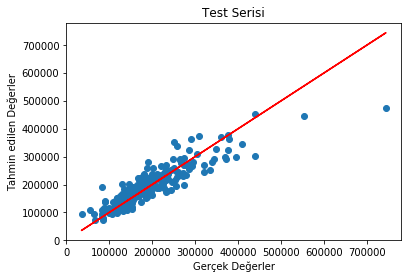

In [7]:
plt.scatter(y_test, Y_test_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Test Serisi")
plt.show()

Maybe we can winsorize or do log transformation for outliners but generally our model looks good.

In [8]:
print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y_test.iloc[:,0], Y_test_pred)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test.iloc[:,0], Y_test_pred)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test.iloc[:,0], Y_test_pred)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test.iloc[:,0] - Y_test_pred) / y_test.iloc[:,0])) * 100))

Ortalama Mutlak Hata (MSE)        : 24056.685189813266
Ortalama Kare Hata (MSE)          : 1299948266.7487316
Kök Ortalama Kare Hata (RMSE)     : 36054.79533638669
Ortalama Mutlak Yüzde Hata (MAPE) : 13.699051153079298


Ortalama 24056 TL'lik bir hata pek istediğim bir şey değil. Kök ortalama kare hata değeri ortalama mutlak hata değerinden fazla olduğuna göre pahalı evlerde hata oranım daha yüksek ki bu grafikten de çıkarılabiliyor. Bu yüksek değerlerde verimin yetersizliğinden kaynaklanıyor olabilir.

## Model Improvment

In [9]:
del X_train["const"]

poly = PolynomialFeatures()

X_new = poly.fit_transform(X_train)

In [10]:
X_new = sm.add_constant(X_new)

model = sm.OLS(y_train, X_new).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     84.62
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:32:40   Log-Likelihood:                -12713.
No. Observations:                1103   AIC:                         2.564e+04
Df Residuals:                     994   BIC:                         2.619e+04
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.875e+05   1.46e+05     -1.286      0.199   -4.74e+05    9.87e+04
x1          8.661e+04   7.88e+04      1.099      0.272   -6.81e+04    2.41e+05
x2          9.455e+05   2.45e+05      3.867      0.000    4.66e+05    1.43e+06
x3          1.095e+04   9046.978      1.210      0.226   -6803.607    2.87e+04
x4          5.692e+05   5.39e+05      1.057      0.291   -4.88e+05    1.63e+06
x5          4.375e+04   5.51e+04      0.794      0.427   -6.43e+04    1.52e+05
x6            -0.1226      0.059     -2.082      0.038      -0.238      -0.007
x7         -8.876e+04   5.32e+04     -1.668      0.096   -1.93e+05    1.57e+04
x8          7.251e+04   3.95e+04      1.837      0.066   -4927.206     1.5e+05
x9          -203.0510    163.478     -1.242      0.215    -523.852     117.750
x10           1.7e+05   8.55e+04      1.989      0.047    2298.316    3.38e+05
x11         1.907e+04   1.84e+04      1.036      0.301   -1.71e+04    5.52e+04
x12         7.262e+04    5.2e+04      1.396      0.163   -2.95e+04    1.75e+05
x13         9.518e+04   1.98e+05      0.482      0.630   -2.93e+05    4.83e+05
x14            1.2527      0.614      2.041      0.041       0.048       2.457
x15          -59.3401    102.391     -0.580      0.562    -260.267     141.587
x16         -2.43e+04   1.07e+04     -2.281      0.023   -4.52e+04   -3398.441
x17         8.636e+04   7.88e+04      1.096      0.273   -6.83e+04    2.41e+05
x18        -8.824e-05      0.001     -0.100      0.920      -0.002       0.002
x19           -0.0004      0.000     -2.391      0.017      -0.001    -7.7e-05
x20        -7.787e-05      0.000     -0.636      0.525      -0.000       0.000
x21            0.0005      0.000      1.536      0.125      -0.000       0.001
x22           -0.0004      0.000     -3.242      0.001      -0.001      -0.000
x23         5499.6900   2.15e+04      0.256      0.798   -3.66e+04    4.76e+04
x24         -1.01e+04   7980.242     -1.266      0.206   -2.58e+04    5560.317
x25          -50.0322     48.957     -1.022      0.307    -146.104      46.039
x26        -7.642e+04   5.43e+04     -1.406      0.160   -1.83e+05    3.02e+04
x27         4933.8459   3899.153      1.265      0.206   -2717.671    1.26e+04
x28         1309.3588   1.56e+04      0.084      0.933   -2.93e+04     3.2e+04
x29        -2.741e+05   7.25e+04     -3.779      0.000   -4.17e+05   -1.32e+05
x30            0.2258      0.172      1.314      0.189      -0.111       0.563
x31          144.5696     38.523      3.753      0.000      68.974     220.165
x32         6935.7867   4296.062      1.614      0.107   -1494.604    1.54e+04
x33         9.455e+05   2.45e+05      3.867      0.000    4.66e+05    1.43e+06
x34         1.721e-05   1.21e-05      1.419      0.156   -6.59e-06     4.1e-05
x35        -3.289e-05   2.31e-05     -1.421      0.156   -7.83e-05    1.25e-05
x3

In [11]:
for feature in model.pvalues[model.pvalues > 0.5]:
    np.delete(X_new,feature)

In [12]:
X_new = sm.add_constant(X_new)

model = sm.OLS(y_train, X_new).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     84.62
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:32:40   Log-Likelihood:                -12713.
No. Observations:                1103   AIC:                         2.564e+04
Df Residuals:                     994   BIC:                         2.619e+04
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.875e+05   1.46e+05     -1.286      0.199   -4.74e+05    9.87e+04
x1          8.661e+04   7.88e+04      1.099      0.272   -6.81e+04    2.41e+05
x2          9.455e+05   2.45e+05      3.867      0.000    4.66e+05    1.43e+06
x3          1.095e+04   9046.978      1.210      0.226   -6803.607    2.87e+04
x4          5.692e+05   5.39e+05      1.057      0.291   -4.88e+05    1.63e+06
x5          4.375e+04   5.51e+04      0.794      0.427   -6.43e+04    1.52e+05
x6            -0.1226      0.059     -2.082      0.038      -0.238      -0.007
x7         -8.876e+04   5.32e+04     -1.668      0.096   -1.93e+05    1.57e+04
x8          7.251e+04   3.95e+04      1.837      0.066   -4927.206     1.5e+05
x9          -203.0510    163.478     -1.242      0.215    -523.852     117.750
x10           1.7e+05   8.55e+04      1.989      0.047    2298.316    3.38e+05
x11         1.907e+04   1.84e+04      1.036      0.301   -1.71e+04    5.52e+04
x12         7.262e+04    5.2e+04      1.396      0.163   -2.95e+04    1.75e+05
x13         9.518e+04   1.98e+05      0.482      0.630   -2.93e+05    4.83e+05
x14            1.2527      0.614      2.041      0.041       0.048       2.457
x15          -59.3401    102.391     -0.580      0.562    -260.267     141.587
x16         -2.43e+04   1.07e+04     -2.281      0.023   -4.52e+04   -3398.441
x17         8.636e+04   7.88e+04      1.096      0.273   -6.83e+04    2.41e+05
x18        -8.824e-05      0.001     -0.100      0.920      -0.002       0.002
x19           -0.0004      0.000     -2.391      0.017      -0.001    -7.7e-05
x20        -7.787e-05      0.000     -0.636      0.525      -0.000       0.000
x21            0.0005      0.000      1.536      0.125      -0.000       0.001
x22           -0.0004      0.000     -3.242      0.001      -0.001      -0.000
x23         5499.6900   2.15e+04      0.256      0.798   -3.66e+04    4.76e+04
x24         -1.01e+04   7980.242     -1.266      0.206   -2.58e+04    5560.317
x25          -50.0322     48.957     -1.022      0.307    -146.104      46.039
x26        -7.642e+04   5.43e+04     -1.406      0.160   -1.83e+05    3.02e+04
x27         4933.8459   3899.153      1.265      0.206   -2717.671    1.26e+04
x28         1309.3588   1.56e+04      0.084      0.933   -2.93e+04     3.2e+04
x29        -2.741e+05   7.25e+04     -3.779      0.000   -4.17e+05   -1.32e+05
x30            0.2258      0.172      1.314      0.189      -0.111       0.563
x31          144.5696     38.523      3.753      0.000      68.974     220.165
x32         6935.7867   4296.062      1.614      0.107   -1494.604    1.54e+04
x33         9.455e+05   2.45e+05      3.867      0.000    4.66e+05    1.43e+06
x34         1.721e-05   1.21e-05      1.419      0.156   -6.59e-06     4.1e-05
x35        -3.289e-05   2.31e-05     -1.421      0.156   -7.83e-05    1.25e-05
x3